In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,NaN,NaN,27.0,31.0,0.0
1,85.0,64.0,59.0,32.0,NaN,NaN
2,86.0,54.0,33.0,16.0,54.0,0.0
3,91.0,78.0,34.0,24.0,36.0,0.0
4,98.0,55.0,13.0,17.0,17.0,NaN
...,...,...,...,...,...,...
340,NaN,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,NaN,22.0,14.0,4.0
342,85.0,NaN,NaN,23.0,34.0,4.0
343,95.0,93.0,21.0,27.0,47.0,6.0


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	68
float64		column 2	69
float64		column 3	65
float64		column 4	76
float64		column 5	63
float64		column 6	73


In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,277.000000,276.000000,280.000000,269.000000,282.000000,272.000000
mean,90.111913,70.072464,30.639286,24.349442,39.265957,3.441176
std,4.493768,18.804888,20.581908,9.198303,41.196563,3.231281
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,22.000000,26.000000,3.000000
75%,92.000000,80.000000,34.000000,27.000000,48.000000,5.000000
max,102.000000,138.000000,155.000000,78.000000,297.000000,20.000000


<AxesSubplot:>

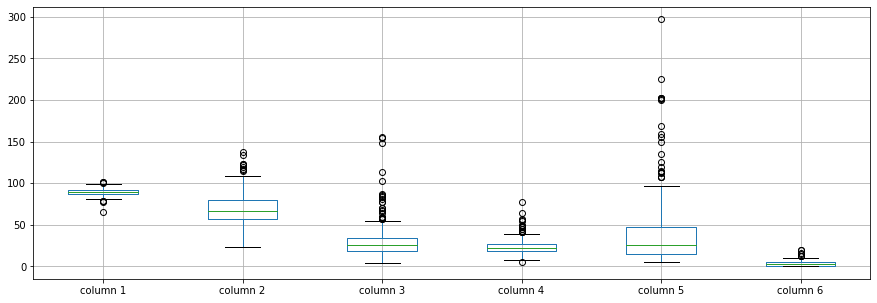

In [26]:
df.boxplot(return_type='axes', figsize=(15,5
                                       ))

In [27]:
df.mean()

column 1    90.111913
column 2    70.072464
column 3    30.639286
column 4    24.349442
column 5    39.265957
column 6     3.441176
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.068095,0.179836,0.209261,0.241900,0.347557
column 2,0.068095,1.000000,0.033101,0.178480,0.091948,0.140972
column 3,0.179836,0.033101,1.000000,0.636739,0.550933,0.257774
column 4,0.209261,0.178480,0.636739,1.000000,0.559387,0.311039
column 5,0.241900,0.091948,0.550933,0.559387,1.000000,0.344116
column 6,0.347557,0.140972,0.257774,0.311039,0.344116,1.000000


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [6,6+14,6+14+14,6+14+14+14,6+14+14+14+14,6+14+14+14,6+14+14,6+14,6], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 226.6168903169178
Epoch: 1 , loss: 227.099610828218
Epoch: 2 , loss: 225.72528439476378
Epoch: 3 , loss: 225.6438228062221
Epoch: 4 , loss: 225.3929145449684
Epoch: 5 , loss: 226.45343598865327
Epoch: 6 , loss: 227.02887616838728
Epoch: 7 , loss: 227.88777451288132
Epoch: 8 , loss: 227.52633303687685
Epoch: 9 , loss: 226.16889444986978
Epoch: 10 , loss: 228.66482398623512
Epoch: 11 , loss: 226.2791028703962
Epoch: 12 , loss: 225.86267453148253
Epoch: 13 , loss: 227.348384312221
Epoch: 14 , loss: 225.69729468936012
Epoch: 15 , loss: 228.02813502720423
Epoch: 16 , loss: 225.41380455380394
Epoch: 17 , loss: 228.5586911156064
Epoch: 18 , loss: 227.6154545375279
Epoch: 19 , loss: 226.5675775437128
Epoch: 20 , loss: 227.62301926385788
Epoch: 21 , loss: 227.84415472121466
Epoch: 22 , loss: 227.87306794666108
Epoch: 23 , loss: 228.20162527901786
Epoch: 24 , loss: 225.58771405901228
Epoch: 25 , loss: 227.5620676

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3     0.037231
column 4    15.000000
column 5    18.000000
column 6     0.037078
Name: 21, dtype: float64

In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,-91.96122,-44.961462,0.000000,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.000000,-22.961516,0.038460
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.040472
...,...,...,...,...,...,...
340,-90.956641,0.00000,0.000000,0.000000,0.000000,0.000000
341,0.000000,0.00000,-31.960948,0.000000,0.000000,0.000000
342,0.000000,-51.95535,-21.955508,0.000000,0.000000,0.000000
343,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

1076.8072080519528

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [39]:
NRMS=numerator/denominator
NRMS


0.42734479238912004

In [40]:
new_df.iloc[66,:]

column 1    86.000000
column 2    54.000000
column 3     0.039748
column 4    21.000000
column 5     0.039712
column 6     2.000000
Name: 66, dtype: float64

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.000000,0.03878,0.038538,27.000000,31.000000,0.000000
1,85.000000,64.00000,59.000000,32.000000,0.038484,0.038460
2,86.000000,54.00000,33.000000,16.000000,54.000000,0.000000
3,91.000000,78.00000,34.000000,24.000000,36.000000,0.000000
4,98.000000,55.00000,13.000000,17.000000,17.000000,0.040472
...,...,...,...,...,...,...
340,0.043359,54.00000,25.000000,22.000000,35.000000,4.000000
341,89.000000,48.00000,0.039052,22.000000,14.000000,4.000000
342,85.000000,0.04465,0.044492,23.000000,34.000000,4.000000
343,95.000000,93.00000,21.000000,27.000000,47.000000,6.000000


In [42]:
imputations[-1].to_excel("Bupa_C_20(imp).xlsx", index=False, header=False)